In [13]:
import numpy as np
import matplotlib.pyplot as plt
import random

Create points with a final destination of 6,6

In [14]:
points = np.array([[-1,-1],[1,1],[-2,2],[1,3],[4,-1],[4,2],[6,1],[6,6]])

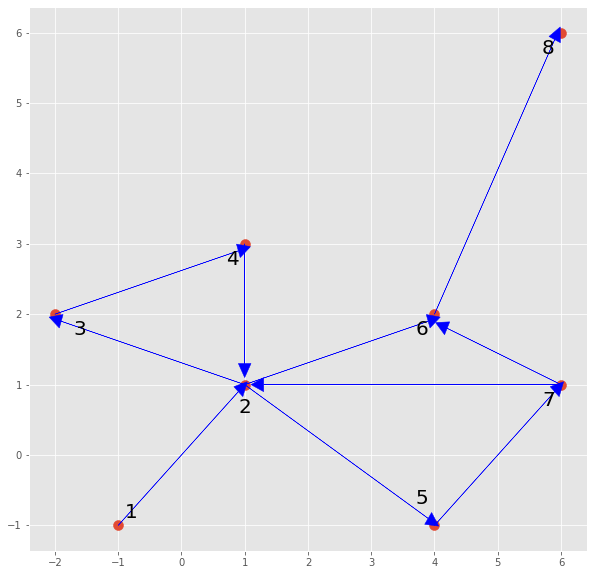

In [15]:
# plot all the paths
def pathplot():
    
    plt.figure(figsize = (10,10))
    plt.style.use('ggplot')
    plt.scatter(points[:,0],points[:,1], s = 100)
    plt.arrow(points[0,0],points[0,1],1.9,1.9, head_width = 0.2, head_length=0.2, color = 'b')
    plt.arrow(points[1,0],points[1,1],-2.9,0.9, head_width = 0.2, head_length=0.2, color = 'b')
    plt.arrow(points[2,0],points[2,1],2.9,0.9, head_width = 0.2, head_length=0.2, color = 'b')
    plt.arrow(points[3,0],points[3,1],0,-1.7, head_width = 0.2, head_length=0.2, color = 'b')
    plt.arrow(points[1,0],points[1,1],2.9,0.9, head_width = 0.2, head_length=0.2, color = 'b')
    plt.arrow(points[1,0],points[1,1],2.9,-1.9, head_width = 0.2, head_length=0.2, color = 'b')
    plt.arrow(points[4,0],points[4,1],1.9,1.9, head_width = 0.2, head_length=0.2, color = 'b')
    plt.arrow(points[6,0],points[6,1],-4.7,0, head_width = 0.2, head_length=0.2, color = 'b')
    plt.arrow(points[6,0],points[6,1],-1.8,0.8, head_width = 0.2, head_length=0.2, color = 'b')
    plt.arrow(points[5,0],points[5,1],1.9,3.9, head_width = 0.2, head_length=0.2, color = 'b')
    plt.annotate('1', xy = (-0.9,-0.9),fontsize ='20'), plt.annotate('2', xy = (0.9,0.6), fontsize = '20')
    plt.annotate('3', xy = (-1.7, 1.7),fontsize ='20'), plt.annotate('4', xy = (0.7, 2.7), fontsize = '20')
    plt.annotate('5', xy = (3.7, -0.7),fontsize = '20'), plt.annotate('6', xy = (3.7, 1.7), fontsize= '20')
    plt.annotate('7', xy = (5.7, 0.7), fontsize = '20'), plt.annotate('8', xy = (5.7, 5.7), fontsize= '20')

    
pathplot()

In [16]:
import networkx as nx

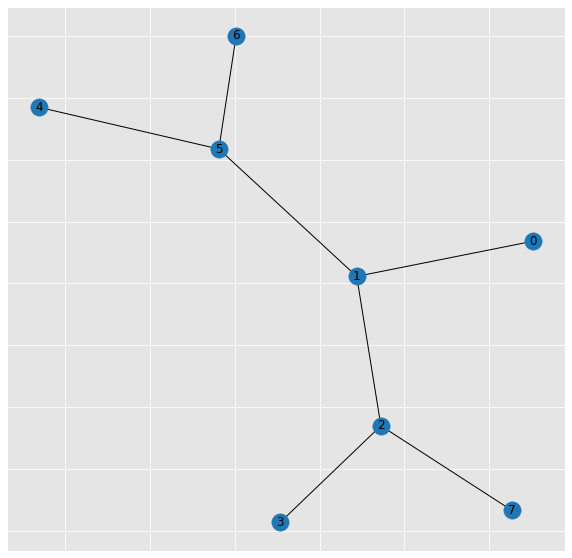

In [17]:
points = [(0,1),(1,5),(5,6), (5,4), (1,2), (2,3), (2,7)]

goal = 7

plt.figure(figsize = (10,10))
G = nx.Graph()
G.add_edges_from(points)
pos = nx.spring_layout(G)
nx.draw_networkx_nodes(G,pos)
nx.draw_networkx_edges(G,pos)
nx.draw_networkx_labels(G,pos)
plt.show()

In [18]:
matrixsize = 8

R = np.matrix(np.ones(shape=(matrixsize,matrixsize)))
R *= -1

In [19]:
for point in points:
    print(point)
    if point[1] == goal:
        R[point] = 100
    else:
        R[point] = 0
    
    if point[0] == goal:
        R[point[::-1]] = 100
    else:
        R[point[::-1]] = 0
        
R[goal,goal] = 100
R

(0, 1)
(1, 5)
(5, 6)
(5, 4)
(1, 2)
(2, 3)
(2, 7)


matrix([[ -1.,   0.,  -1.,  -1.,  -1.,  -1.,  -1.,  -1.],
        [  0.,  -1.,   0.,  -1.,  -1.,   0.,  -1.,  -1.],
        [ -1.,   0.,  -1.,   0.,  -1.,  -1.,  -1., 100.],
        [ -1.,  -1.,   0.,  -1.,  -1.,  -1.,  -1.,  -1.],
        [ -1.,  -1.,  -1.,  -1.,  -1.,   0.,  -1.,  -1.],
        [ -1.,   0.,  -1.,  -1.,   0.,  -1.,   0.,  -1.],
        [ -1.,  -1.,  -1.,  -1.,  -1.,   0.,  -1.,  -1.],
        [ -1.,  -1.,   0.,  -1.,  -1.,  -1.,  -1., 100.]])

In [20]:
Q = np.matrix(np.zeros([matrixsize,matrixsize]))
gamma = 0.8

initial_state = 1

def available_actions(state):
    current_state_row = R[state,]
    av_act = np.where(current_state_row >= 0)[1]
    return av_act

available_act = available_actions(initial_state)

def sample_next_action(available_actions_range):
    next_action = int(np.random.choice(available_act,1))
    return next_action


action = sample_next_action(available_act)

def update(current_state,action,gamma):
    max_index = np.where(Q[action,]== np.max(Q[action,]))[1]
    
    if max_index.shape[0] >1:
        max_index = int(np.random.choice(max_index, size = 1))
    else:
        max_index = int(max_index)
    
    max_value = Q[action,max_index]
    
    Q[current_state,action] = R[current_state,action] + gamma*max_value
    print('max val', R[current_state,action] + gamma *max_value)
    
    if (np.max(Q) >0):
        return(np.sum(Q/np.max(Q)*100))
    else:
        return (0)
    
update(initial_state,action,gamma)

max val 0.0


0

In [9]:
scores = []
for i in range(700):
    current_state = np.random.randint(0, int(Q.shape[0]))
    available_act = available_actions(current_state)
    action = sample_next_action(available_act)
    score = update(current_state,action,gamma)
    scores.append(score)
    print ('Score:', str(score))

print("Trained Q matrix:")
print(Q/np.max(Q)*100)

# Testing
current_state = 0
steps = [current_state]



max val 100.0
Score: 100.0
max val 0.0
Score: 100.0
max val 0.0
Score: 100.0
max val 180.0
Score: 155.55555555555554
max val 0.0
Score: 155.55555555555554
max val 0.0
Score: 155.55555555555554
max val 180.0
Score: 155.55555555555554
max val 0.0
Score: 155.55555555555554
max val 180.0
Score: 200.0
max val 0.0
Score: 200.0
max val 144.0
Score: 280.0
max val 0.0
Score: 280.0
max val 0.0
Score: 280.0
max val 0.0
Score: 280.0
max val 0.0
Score: 280.0
max val 0.0
Score: 280.0
max val 144.0
Score: 360.0
max val 0.0
Score: 360.0
max val 115.2
Score: 424.0
max val 0.0
Score: 424.0
max val 144.0
Score: 424.0
max val 144.0
Score: 424.0
max val 144.0
Score: 424.0
max val 115.2
Score: 424.0
max val 0.0
Score: 424.0
max val 144.0
Score: 424.0
max val 0.0
Score: 424.0
max val 115.2
Score: 488.0
max val 0.0
Score: 488.0
max val 144.0
Score: 488.0
max val 244.0
Score: 386.2295081967213
max val 0.0
Score: 386.2295081967213
max val 195.20000000000002
Score: 407.21311475409834
max val 244.0
Score: 433.442

max val 312.79424059620726
Score: 878.3549717748359
max val 392.79424059620726
Score: 878.3549717748359
max val 172.11392000000006
Score: 878.3549717748359
max val 392.79424059620726
Score: 878.3549717748359
max val 392.79424059620726
Score: 878.7179379627761
max val 392.79424059620726
Score: 878.7179379627761
max val 314.23539247696584
Score: 879.0083109131282
max val 497.04852094820654
Score: 878.9217567199354
max val 250.2353924769658
Score: 879.2116986109221
max val 314.23539247696584
Score: 899.1479801409282
max val 251.38831398157268
Score: 915.097005364933
max val 251.38831398157268
Score: 915.097005364933
max val 314.23539247696584
Score: 915.3869472559197
max val 397.63881675856527
Score: 916.3616159166606
max val 251.38831398157268
Score: 916.3616159166606
max val 314.23539247696584
Score: 916.3616159166606
max val 251.38831398157268
Score: 932.3106411406654
max val 251.38831398157268
Score: 932.3106411406654
max val 314.23539247696584
Score: 932.3106411406654
max val 251.388

max val 255.60385918742878
Score: 982.4549461010135
max val 255.60385918742878
Score: 982.4549461010135
max val 319.7464698799545
Score: 982.4549461010135
max val 319.7464698799545
Score: 982.4549461010135
max val 319.7464698799545
Score: 982.4549461010135
max val 399.68308734994304
Score: 982.4549461010135
max val 399.68308734994304
Score: 982.4549461010135
max val 499.68308734994304
Score: 982.3150268488891
max val 399.7464698799545
Score: 982.3277113946774
max val 255.60385918742878
Score: 982.3277113946774
max val 319.7971759039636
Score: 982.3378590313082
max val 319.7971759039636
Score: 982.3378590313082
max val 499.68308734994304
Score: 982.3537147135437
max val 319.7971759039636
Score: 982.3638623501743
max val 399.7464698799545
Score: 982.3638623501743
max val 255.60385918742878
Score: 982.3638623501743
max val 399.7464698799545
Score: 982.3765468959625
max val 399.7464698799545
Score: 982.3892314417508
max val 399.7464698799545
Score: 982.3892314417508
max val 399.74646987995

Score: 982.6126585423665
max val 319.965971763308
Score: 982.6143601351455
max val 399.95746470413496
Score: 982.6143601351455
max val 255.96597176330798
Score: 982.6335180093145
max val 255.96597176330798
Score: 982.6526758834832
max val 319.95746470413496
Score: 982.6526758834832
max val 399.95746470413496
Score: 982.6526758834832
max val 399.95746470413496
Score: 982.6526758834832
max val 255.96597176330798
Score: 982.6526758834832
max val 399.95746470413496
Score: 982.6526758834832
max val 204.7727774106464
Score: 982.6680021828183
max val 319.95746470413496
Score: 982.6680021828183
max val 399.95746470413496
Score: 982.6680021828183
max val 399.95746470413496
Score: 982.6680021828183
max val 399.95746470413496
Score: 982.6680021828183
max val 399.95746470413496
Score: 982.670129173792
max val 499.9468308801687
Score: 982.670129173792
max val 319.965971763308
Score: 982.671830766571
max val 255.96597176330798
Score: 982.6909886407399
max val 204.7727774106464
Score: 982.70631494007

Most efficient path:
[0, 1, 2, 7]


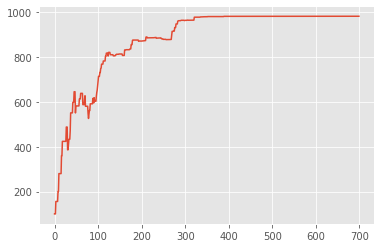

In [10]:
while current_state != 7:

    next_step_index = np.where(Q[current_state,]
        == np.max(Q[current_state,]))[1]

    if next_step_index.shape[0] > 1:
        next_step_index = int(np.random.choice(next_step_index, size = 1))
    else:
        next_step_index = int(next_step_index)

    steps.append(next_step_index)
    current_state = next_step_index

print("Most efficient path:")
print(steps)

plt.plot(scores)
plt.show()


In [11]:
a = np.array([1,1,1,2,3,3])

In [12]:
np.where(a > 2)[0]

array([4, 5], dtype=int64)